In [1]:
# LIBRARIES

import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

numpy: 1.21.5
matplotlib: 3.5.1


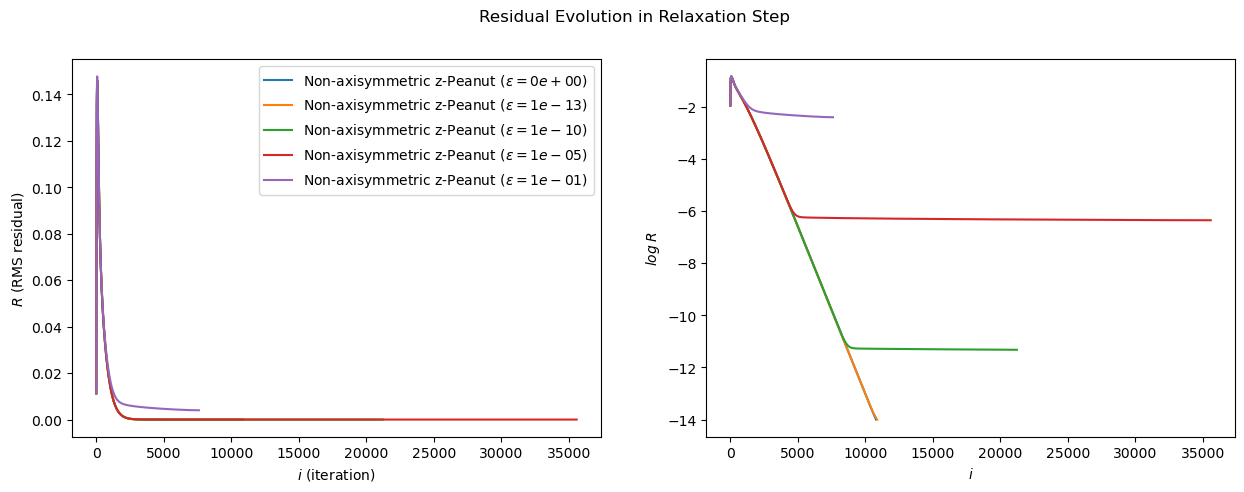

In [84]:
# RESIDUAL EVOLUTION

fig, (ax1, ax2) = plt.subplots(1,2)

entries = [
	# [np.genfromtxt('residuals_horizon_15x60.csv', delimiter=','), 'Horizon 15x60'],
	# [np.genfromtxt('residuals_peanut_15x60.csv', delimiter=','), 'z-Peanut 15x60'],
	# [np.genfromtxt('residuals_ellipsoid_15x60.csv', delimiter=','), 'Ellipsoid 15x60'],
	# [np.genfromtxt('residuals_numerical_15x60.csv', delimiter=','), 'x-Peanut 15x60'],
	# [np.genfromtxt('residuals_nonaxi_peanut1_15x60.csv', delimiter=','), 'Non-axi. z-Peanut 15x60'],
	# [np.genfromtxt('residuals_nonaxi_peanut_15x60.csv', delimiter=','), 'Non-axi. z-Peanut 15x60'],
	[np.genfromtxt('residuals_nonaxi_peanut_0e+00_15x60.csv', delimiter=','), r'Non-axisymmetric z-Peanut $(\epsilon = 0e+00)$'],
	[np.genfromtxt('residuals_nonaxi_peanut_1e-13_15x60.csv', delimiter=','), r'Non-axisymmetric z-Peanut $(\epsilon = 1e-13)$'],
	[np.genfromtxt('residuals_nonaxi_peanut_1e-10_15x60.csv', delimiter=','), r'Non-axisymmetric z-Peanut $(\epsilon = 1e-10)$'],
	[np.genfromtxt('residuals_nonaxi_peanut_1e-05_15x60.csv', delimiter=','), r'Non-axisymmetric z-Peanut $(\epsilon = 1e-05)$'],
	[np.genfromtxt('residuals_nonaxi_peanut_1e-01_15x60.csv', delimiter=','), r'Non-axisymmetric z-Peanut $(\epsilon = 1e-01)$'],
]


for entry in entries:
	i_values = entry[0][:,0]
	residuals = entry[0][:,1]

	label = entry[1]

	# log_i_values = []
	# for i in i_values:
	# 	log_i_values.append(np.log(i) / np.log(10))

	log_residuals = []
	for residual in residuals:
		log_residuals.append(np.log(residual) / np.log(10))

	ax1.plot(i_values, residuals, label = label)
	ax1.set(xlabel='$i$ (iteration)', ylabel='$R$ (RMS residual)')
	

	ax2.plot(i_values, log_residuals, label = label)
	ax2.set(xlabel='$i$', ylabel='$log \; R$')
	# ax2.plot(log_i_values, log_residuals)
	# ax2.set(xlabel='$\log \; i$', ylabel='$\log \; R$')

fig.suptitle('Residual Evolution in Relaxation Step')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax1.legend()
# ax2.legend()
plt.show()

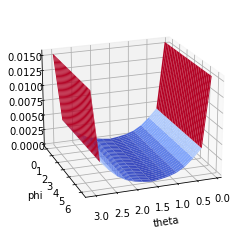

In [21]:
# RESIDUAL DISTRIBUTION ANIMATION

entries = np.genfromtxt('residual_distribution.csv', delimiter=',')

x = entries[0]
y = entries[1]

unique_x = list(set(x))
unique_y = list(set(y))
unique_x.sort()
unique_y.sort()

z = np.zeros((len(unique_x), len(unique_y), len(entries) - 2))

for row in range(2, len(entries)):
	for col in range(len(entries[row])):
		x_index = unique_x.index(x[col])
		y_index = unique_y.index(y[col])
		z[x_index][y_index][row-2] = entries[row][col]

maxFrame = z.shape[2]
X, Y = np.meshgrid(unique_x, unique_y, indexing='ij')

def update_plot(frame_number, z, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, z[:,:,frame_number%maxFrame], cmap=cm.coolwarm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(X, Y, z[:,:,0], color='0.75', rstride=1, cstride=1, cmap=cm.coolwarm)]

ax.set_xlabel("theta")
ax.set_ylabel("phi")
ax.view_init(20, 70) # elev, azim
# fig.colorbar(plot[0], shrink=0.5, aspect=5)

fps = 10 # frame per sec
frn = 50 # frame number of the animation
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(z, plot), interval=100/fps)

fn = 'residual_distribution_animation' # filename
dpi = 200 # dots per inch
ani.save(fn+'.gif',writer='imagemagick',fps=fps, dpi=dpi)

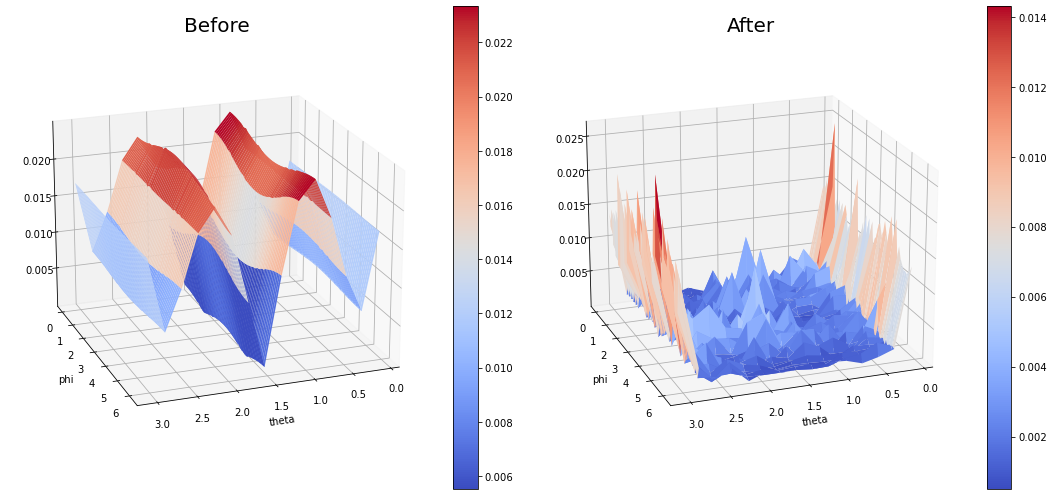

In [77]:
# RESIDUAL DISTRIBUTION COMPARISON

entries = np.genfromtxt('residual_distribution.csv', delimiter=',')

x = entries[0]
y = entries[1]

unique_x = list(set(x))
unique_y = list(set(y))
unique_x.sort()
unique_y.sort()

z = np.zeros((len(unique_x), len(unique_y), len(entries) - 2))

for row in range(2, len(entries)):
	for col in range(len(entries[row])):
		x_index = unique_x.index(x[col])
		y_index = unique_y.index(y[col])
		z[x_index][y_index][row-2] = entries[row][col]

maxFrame = z.shape[2]
X, Y = np.meshgrid(unique_x, unique_y, indexing='ij')

fig = plt.figure(figsize=(15, 7))
# fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, z[:,:,0], color='0.75', rstride=1, cstride=1, cmap=cm.coolwarm)
fig.colorbar(surf1)
plt.title('Before', fontsize=20)
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, z[:,:,-1], color='0.75', rstride=1, cstride=1, cmap=cm.coolwarm)
fig.colorbar(surf2)
plt.title('After', fontsize=20)

ax1.set_xlabel("theta")
ax2.set_xlabel("theta")
ax1.set_ylabel("phi")
ax2.set_ylabel("phi")
ax1.view_init(20, 70) # elev, azim
ax2.view_init(20, 70) # elev, azim
plt.tight_layout()

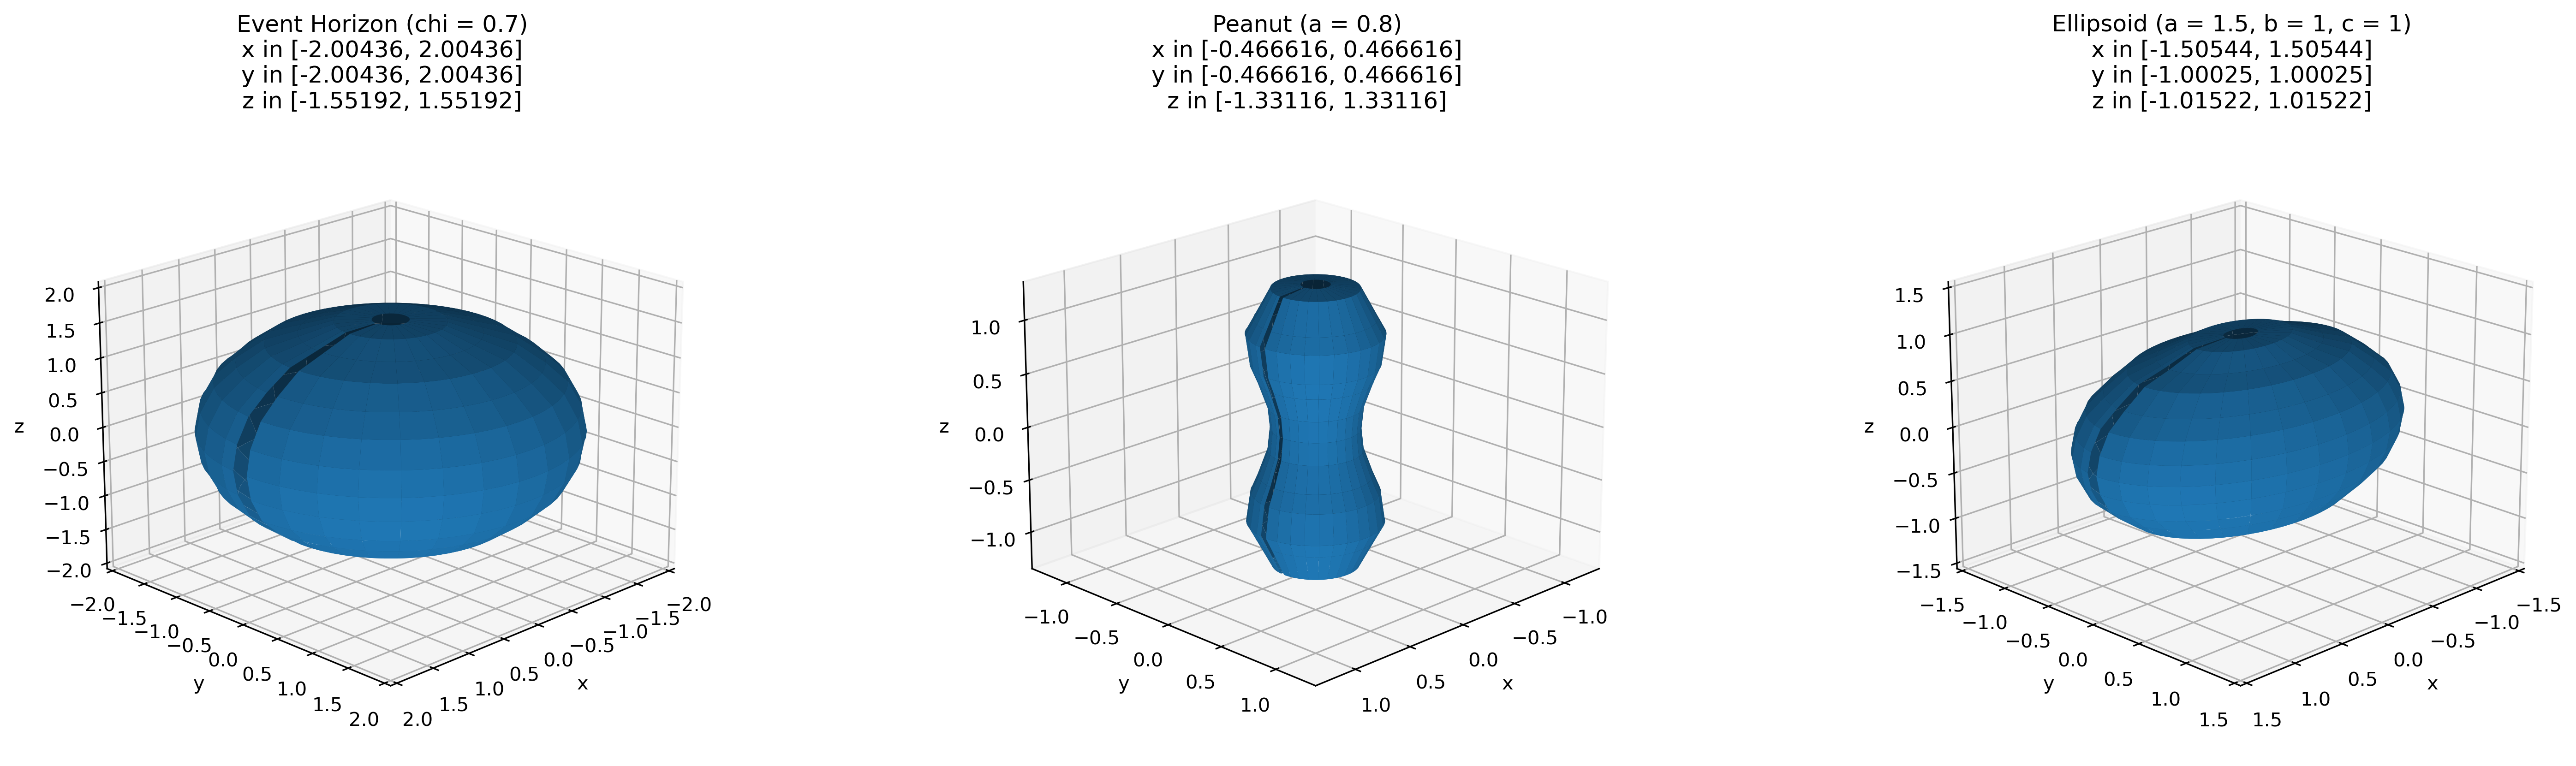

In [146]:
# values = ['round', 'horizon', 'ellipsoid', 'peanut', 'dented']
values = ['horizon', 'peanut', 'ellipsoid']

N_theta = 15
N_phi = 4*N_theta

fig = plt.figure(layout="constrained")

index = 1
for value in values:
	embedding = np.genfromtxt(f'embedding_{value}_{N_theta}x{N_phi}.csv', delimiter=',')

	x = embedding[:,0]
	y = embedding[:,1]
	z = embedding[:,2]

	X = np.reshape(x, (N_theta, N_phi))
	Y = np.reshape(y, (N_theta, N_phi))
	Z = np.reshape(z, (N_theta, N_phi))

	ax = fig.add_subplot(2, 3, index, projection='3d')
	ax.plot_surface(X, Y, Z)

	side = 0

	match value:
		case 'round':
			side = 2
			plt.title(f'Round Sphere (R = 2)\nx in [{min(x)}, {max(x)}]\ny in [{min(y)}, {max(y)}]\nz in [{min(z)}, {max(z)}]')
		case 'horizon':
			side = 2
			plt.title(f'Event Horizon (chi = 0.7)\nx in [{min(x)}, {max(x)}]\ny in [{min(y)}, {max(y)}]\nz in [{min(z)}, {max(z)}]')
		case 'ellipsoid':
			side = 1.5
			plt.title(f'Ellipsoid (a = 1.5, b = 1, c = 1)\nx in [{min(x)}, {max(x)}]\ny in [{min(y)}, {max(y)}]\nz in [{min(z)}, {max(z)}]')
		case 'peanut':
			side = 1.3
			plt.title(f'Peanut (a = 0.8)\nx in [{min(x)}, {max(x)}]\ny in [{min(y)}, {max(y)}]\nz in [{min(z)}, {max(z)}]')
		case 'dented':
			side = 1.2
			plt.title(f'Dented Sphere\nx in [{min(x)}, {max(x)}]\ny in [{min(y)}, {max(y)}]\nz in [{min(z)}, {max(z)}]')
		case _:
			plt.title(f'x in [{min(x)}, {max(x)}]\ny in [{min(y)}, {max(y)}]\nz in [{min(z)}, {max(z)}]')
	
	ax.set_xlabel("x")
	ax.set_ylabel("y")
	ax.set_zlabel("z")
	
	ax.set_xlim(-side, side)
	ax.set_ylim(-side, side)
	ax.set_zlim(-side, side)
	ax.view_init(20, 45) # elev, azim

	index += 1

fig.set_size_inches(20, 10)
fig.set_dpi(300)

plt.show()

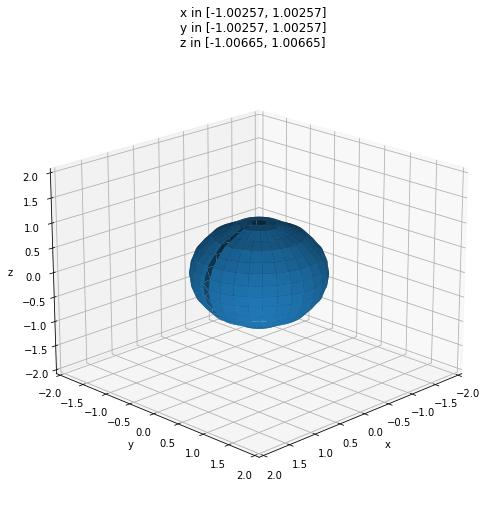

In [25]:
N_theta = 15
N_phi = 4*N_theta

fig = plt.figure(layout="constrained")

embedding = np.genfromtxt(f'embedding_nonaxi_peanut_{N_theta}x{N_phi}.csv', delimiter=',')
# print("chi", chi)
# print("x: ", min(x), max(x))
# print("y: ", min(y), max(y))
# print("z: ", min(z), max(z))

x = embedding[:,0]
y = embedding[:,1]
z = embedding[:,2]

X = np.reshape(x, (N_theta, N_phi))
Y = np.reshape(y, (N_theta, N_phi))
Z = np.reshape(z, (N_theta, N_phi))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
# ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

plt.title(f'x in [{min(x)}, {max(x)}]\ny in [{min(y)}, {max(y)}]\nz in [{min(z)}, {max(z)}]')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

side = 2
ax.set_xlim(-side, side)
ax.set_ylim(-side, side)
ax.set_zlim(-side, side)

ax.view_init(20, 45) # elev, azim
fig.set_size_inches(20, 7, forward=True)

plt.show()

/usr/lib/python3/dist-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


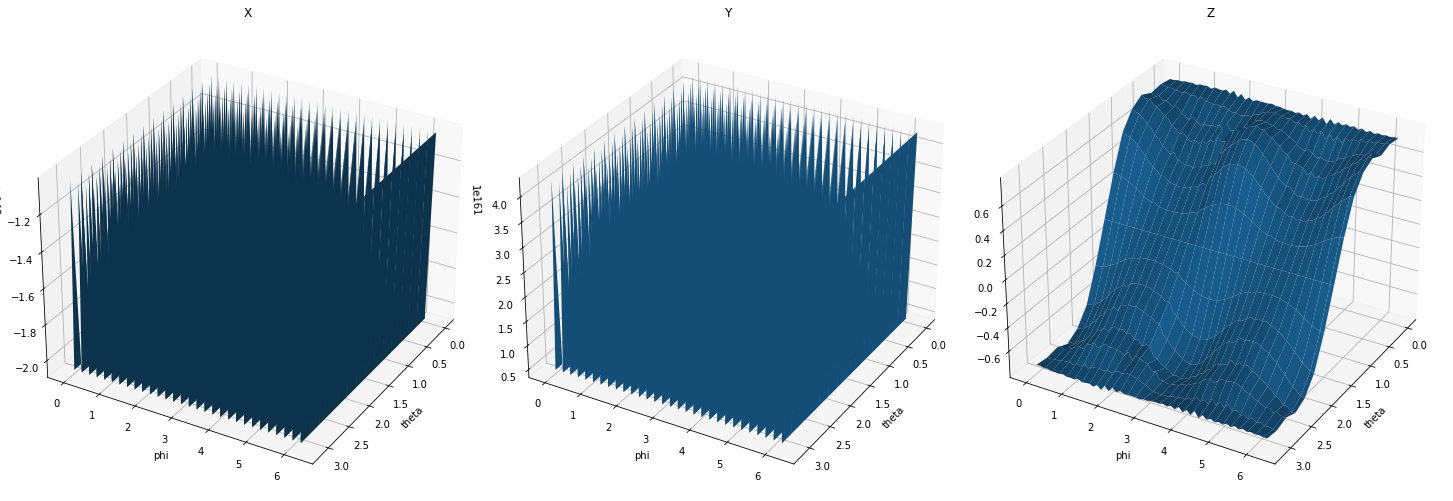

In [19]:
N_theta = 15
N_phi = 4*N_theta

fig = plt.figure(layout="constrained")

embedding = np.genfromtxt(f'embedding_numerical_{N_theta}x{N_phi}.csv', delimiter=',')

x = embedding[:,0]
y = embedding[:,1]
z = embedding[:,2]

X = np.reshape(x, (N_theta, N_phi))
Y = np.reshape(y, (N_theta, N_phi))
Z = np.reshape(z, (N_theta, N_phi))

theta = np.linspace(0, np.pi, N_theta)
phi = np.linspace(0, 2 * np.pi, N_phi)

Theta, Phi = np.meshgrid(theta, phi, indexing='ij')

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X=Theta, Y=Phi, Z=X)
plt.title('X')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X=Theta, Y=Phi, Z=Y)
plt.title('Y')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X=Theta, Y=Phi, Z=Z)
plt.title('Z')

ax1.set_xlabel("theta")
ax2.set_xlabel("theta")
ax3.set_xlabel("theta")
ax1.set_ylabel("phi")
ax2.set_ylabel("phi")
ax3.set_ylabel("phi")
ax1.view_init(30, 30) # elev, azim
ax2.view_init(30, 30) # elev, azim
ax3.view_init(30, 30) # elev, azim

fig.set_size_inches(20, 7, forward=True)

plt.show()

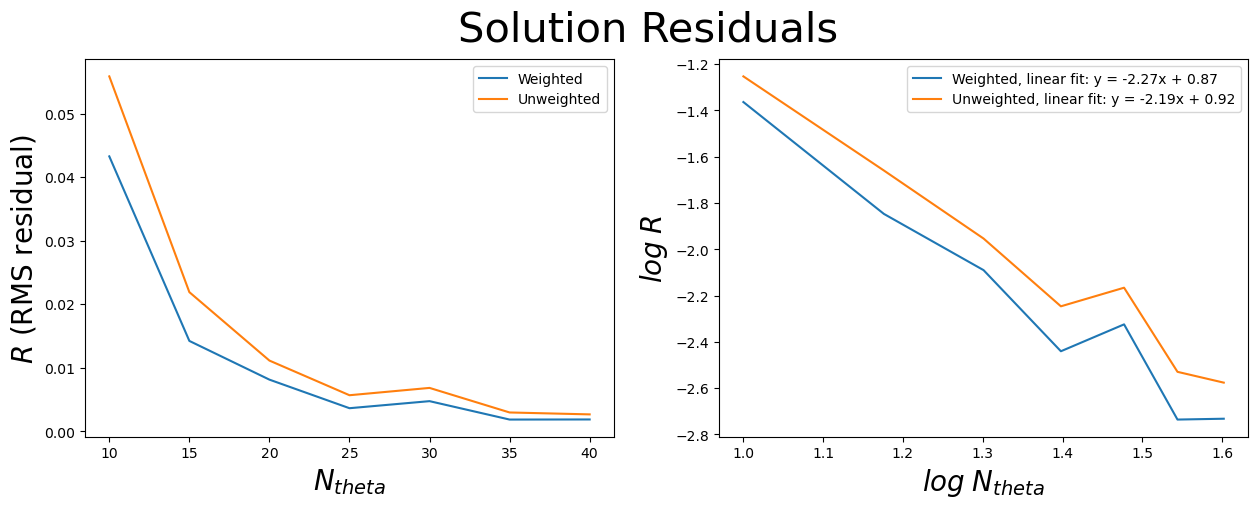

In [69]:
# SOLUTION RESIDUALS (CONVERGENCE TEST)

fig, (ax1, ax2) = plt.subplots(1,2)

entries = [
	[np.genfromtxt('solution_residuals.csv', delimiter=','), 'Weighted'],
	[np.genfromtxt('solution_residuals_unweighted.csv', delimiter=','), 'Unweighted'],
]

for entry in entries:
	N_values = entry[0][:,0]
	residuals = entry[0][:,1]
	log_N_values = []
	log_residuals = []

	for N in N_values:
		log_N_values.append(np.log(N) / np.log(10))
	for residual in residuals:
		log_residuals.append(np.log(residual) / np.log(10))

	label = entry[1]


	ax1.plot(N_values, residuals, label=label)
	ax1.set(xlabel='$N_{theta}$', ylabel='$R$ (RMS residual)')

	a, b = np.polyfit(log_N_values, log_residuals, 1)
	ax2.plot(log_N_values, log_residuals, label=f'{label}, linear fit: y = {a:.2f}x + {b:.2f}')
	ax2.set(xlabel='$log \; N_{theta}$', ylabel='$log \; R$')

ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.xaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

fig.suptitle('Solution Residuals', fontsize=30)
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax1.legend()
ax2.legend()
plt.show()

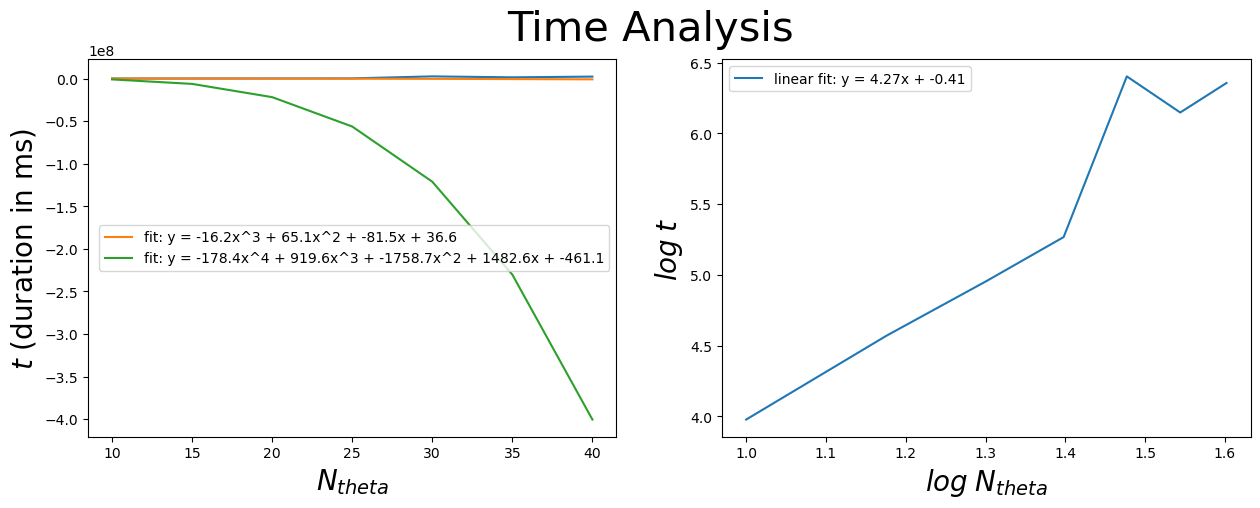

In [87]:
# TIME ANALYSIS

fig, (ax1, ax2) = plt.subplots(1,2)

entries = np.genfromtxt('durations.csv', delimiter=',')

N_values = entries[:,0]
durations = entries[:,1]
log_N_values = []
log_durations = []

for N in N_values:
	log_N_values.append(np.log(N) / np.log(10))
for duration in durations:
	log_durations.append(np.log(duration) / np.log(10))

ax1.plot(N_values, durations)
x = N_values
d, c, b, a = np.polyfit(log_N_values, log_durations, 3)
ax1.plot(x, d*x**3 + c*x**2 + b*x + a, label=f'fit: y = {d:.1f}x^3 + {c:.1f}x^2 + {b:.1f}x + {a:.1f}')
e, d, c, b, a = np.polyfit(log_N_values, log_durations, 4)
ax1.plot(x, e*x**4 + d*x**3 + c*x**2 + b*x + a, label=f'fit: y = {e:.1f}x^4 + {d:.1f}x^3 + {c:.1f}x^2 + {b:.1f}x + {a:.1f}')
# f, e, d, c, b, a = np.polyfit(log_N_values, log_durations, 5)
# ax1.plot(x, f*x**5 + e*x**4 + d*x**3 + c*x**2 + b*x + a, label=f'fit: y = {f:.1f}x^5 + {e:.1f}x^4 + {d:.1f}x^3 + {c:.1f}x^2 + {b:.1f}x + {a:.1f}')
ax1.set(xlabel='$N_{theta}$', ylabel='$t$ (duration in ms)')

a, b = np.polyfit(log_N_values, log_durations, 1)
ax2.plot(log_N_values, log_durations, label=f'linear fit: y = {a:.2f}x + {b:.2f}')
ax2.set(xlabel='$log \; N_{theta}$', ylabel='$log \; t$')

ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.xaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

fig.suptitle('Time Analysis', fontsize=30)
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax1.legend()
ax2.legend()
plt.show()

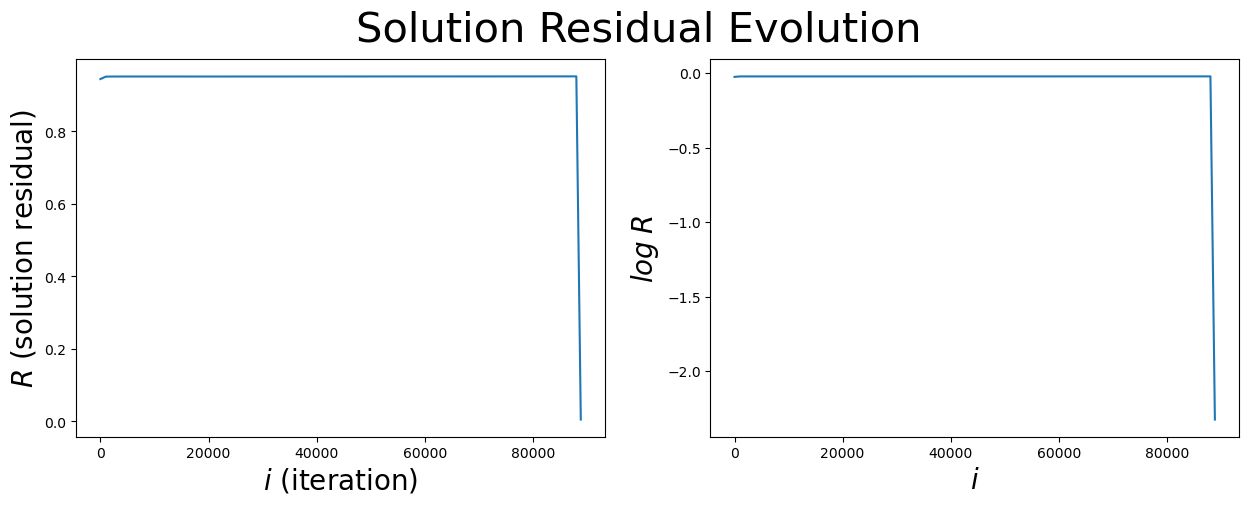

In [13]:
# SOLUTION RESIDUAL EVOLUTION

fig, (ax1, ax2) = plt.subplots(1,2)

entries = np.genfromtxt('solution_residual_evolution.csv', delimiter=',')

iterations = entries[:,0]
residuals = entries[:,1]
log_residuals = []

for residual in residuals:
	log_residuals.append(np.log(residual) / np.log(10))

ax1.plot(iterations, residuals)
ax1.set(xlabel='$i$ (iteration)', ylabel='$R$ (solution residual)')

ax2.plot(iterations, log_residuals)
ax2.set(xlabel='$i$', ylabel='$log \; R$')

ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.xaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

fig.suptitle('Solution Residual Evolution', fontsize=30)
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

plt.show()

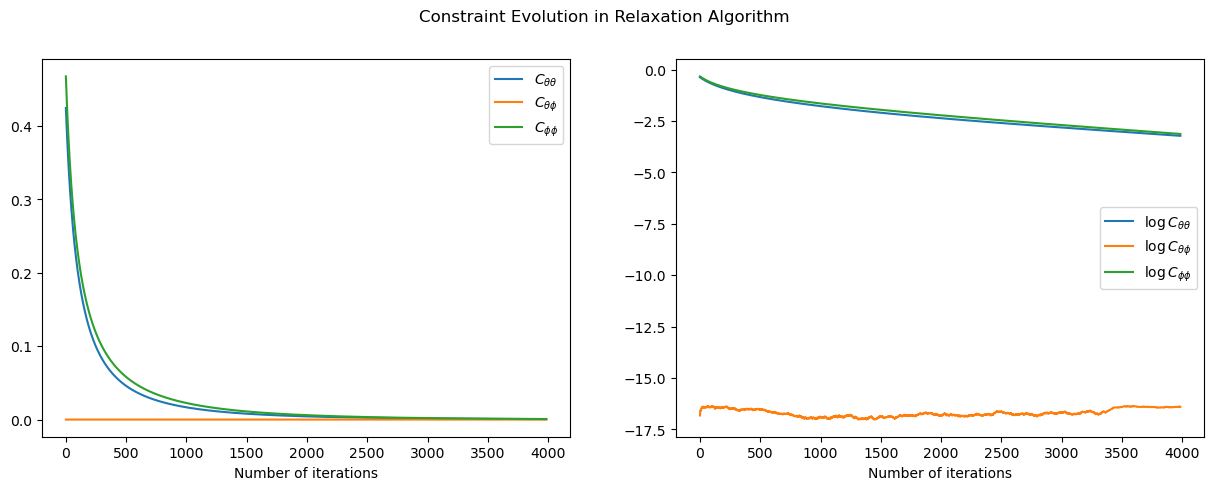

In [36]:
# CONSTRAINTS EVOLUTION

fig, (ax1, ax2) = plt.subplots(1,2)

entries = np.genfromtxt('constraints_nonaxi_peanut_0e+00_15x60.csv', delimiter=',')

C_theta_theta = entries[:,0]
C_theta_phi = entries[:,1]
C_phi_phi = entries[:,2]

log_C_theta_theta = []
for c in C_theta_theta:
	log_C_theta_theta.append(np.log(c) / np.log(10))

log_C_theta_phi = []
for c in C_theta_phi:
	log_C_theta_phi.append(np.log(c) / np.log(10))

log_C_phi_phi = []
for c in C_phi_phi:
	log_C_phi_phi.append(np.log(c) / np.log(10))

ax1.plot(C_theta_theta, label=r'$C_{\theta \theta}$')
ax1.plot(C_theta_phi, label=r'$C_{\theta \phi}$')
ax1.plot(C_phi_phi, label=r'$C_{\phi \phi}$')

ax2.plot(log_C_theta_theta, label=r'$\log C_{\theta \theta}$')
ax2.plot(log_C_theta_phi, label=r'$\log C_{\theta \phi}$')
ax2.plot(log_C_phi_phi, label=r'$\log C_{\phi \phi}$')

fig.suptitle('Constraint Evolution in Relaxation Algorithm')
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

ax1.set_xlabel('Number of iterations')
ax2.set_xlabel('Number of iterations')

ax1.legend()
ax2.legend()
plt.show()